来源：https://www.kaggle.com/jeffd23/dogs-vs-cats-redux-kernels-edition/catdognet-keras-convnet-starter

keras和VGG模型。

In [99]:
import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation, Conv2D
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils


resizes the image to 64x64,
use samples 2000 images (8%) of the data,

In [121]:
train_dir = '../input/train/'
test_dir = '../input/test/'

# 设置图片的规则，重置的大小
ROWS = 64
COLS = 64
CHANNELS = 3

train_images = [train_dir+i for i in os.listdir(train_dir)] #全部的训练数据
train_dogs = [train_dir+i for i in os.listdir(train_dir) if 'dog' in i]
train_cats = [train_dir+i for i in os.listdir(train_dir) if 'cat' in i]

test_images = [test_dir+i for i in os.listdir(test_dir)]

# 限制于电脑和kaggle kernel的性能，实用部分数据集
train_images = train_dogs[:1000] + train_cats[:1000]
random.shuffle(train_images) #打乱数据顺序

test_images = test_images[:25]



In [155]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    
    return cv2.resize(img, (ROWS, COLS), interpolation = cv2.INTER_CUBIC)

def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS,CHANNELS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data
            
train = prep_data(train_images)
test = prep_data(test_images)
tmptest = test

print("Train shape:",train.shape)
print("Test shape:",test.shape)


Processed 0 of 2000
Processed 250 of 2000
Processed 500 of 2000
Processed 750 of 2000
Processed 1000 of 2000
Processed 1250 of 2000
Processed 1500 of 2000
Processed 1750 of 2000
Processed 0 of 25
('Train shape:', (2000, 64, 64, 3))
('Test shape:', (25, 64, 64, 3))


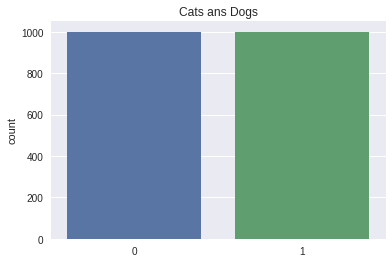

In [156]:
# generating the labels
labels = []
for i in train_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

#显示猫和狗的训练样个数
sns.countplot(labels)
sns.plt.title("Cats ans Dogs")

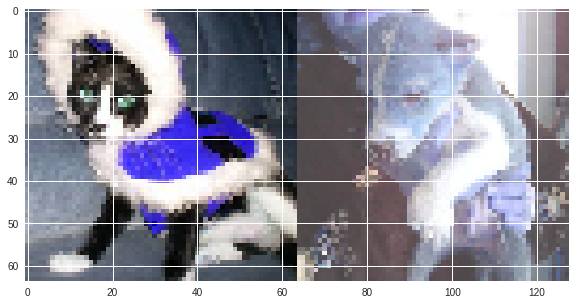

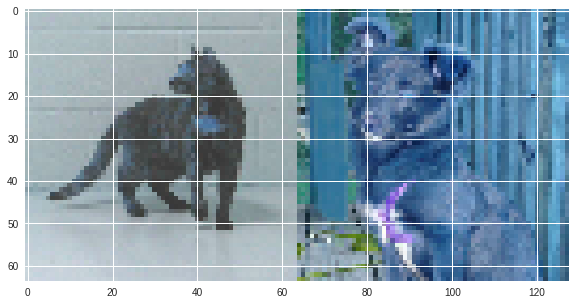

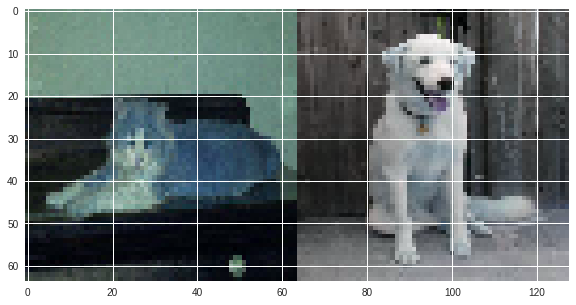

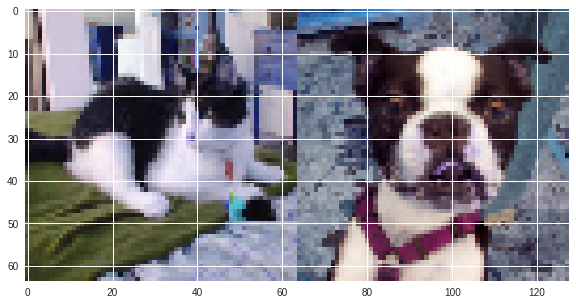

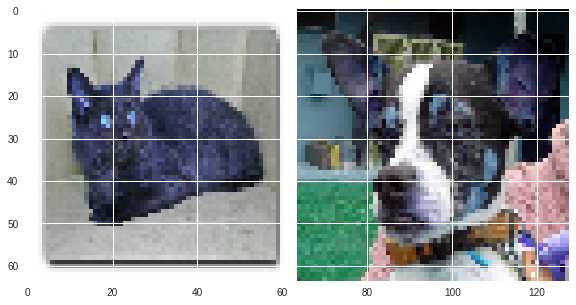

In [157]:
# 检查猫和狗的图片,链接猫狗一起显示
def show_cats_and_dogs(idx):
    cat = read_image(train_cats[idx])
    dog = read_image(train_dogs[idx])
    #并列猫狗一起显示
    pair = np.concatenate((cat, dog), axis=1)
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
    
for idx in range(0,5):
    show_cats_and_dogs(idx)


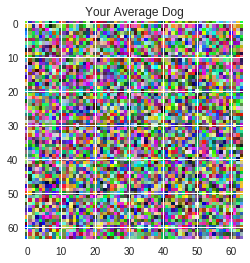

In [160]:
# 所有的猫狗的图片的像素求平均值，得到图形，观察不同
dog_avg = np.array([dog for i,dog in enumerate(train) if labels[i] == 1]).mean(axis=0)
plt.imshow(dog_avg)
plt.title('Your Average Dog')


(64, 64, 3)


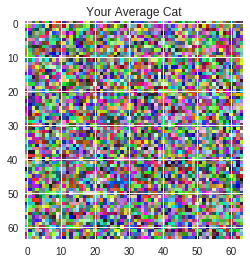

In [161]:
cat_avg = np.array([cat for i,cat in enumerate(train) if labels[i] == 0]).mean(axis=0)
print(cat_avg.shape)
plt.imshow(cat_avg)
plt.title('Your Average Cat')

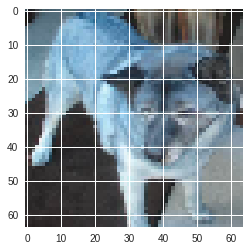

In [162]:
plt.imshow(test[0])
plt.show()

设置catDogNet16，参考VGG-16,
Optimizer: RMSprop
Output layer activation : Sigmoid
Dropout some layers for efficiency



In [163]:
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

def catdog():
    model = Sequential()
    # input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
    # this applies 32 convolution filters of size 3x3 each.
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(ROWS, COLS, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model    

model = catdog()


In [164]:
# Train and Predict
np_epoch = 2
batch_size = 32

model.fit(train, labels,batch_size=batch_size, epochs=np_epoch)
predictions = model.predict(test)



Epoch 1/2
2000/2000 [==============================] - 46s - loss: 1.6117 - acc: 0.5260     

I am 0.75 sure this is a Cat


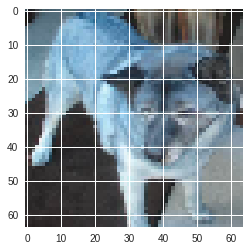

I am 0.72 sure this is a Cat


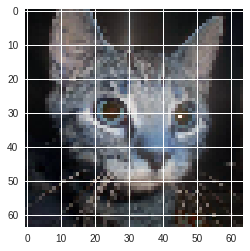

I am 0.69 sure this is a Cat


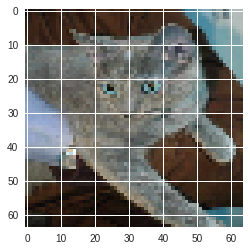

I am 0.57 sure this is a Cat


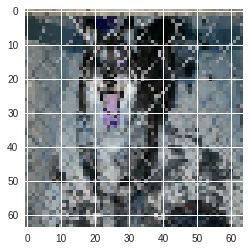

I am 0.71 sure this is a Cat


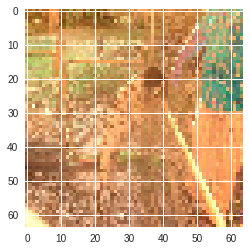

I am 0.61 sure this is a Cat


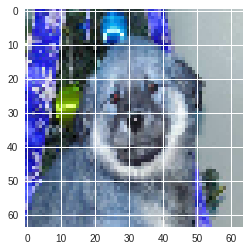

I am 0.70 sure this is a Cat


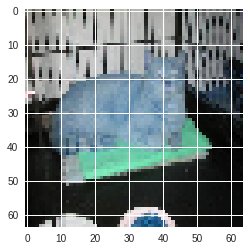

I am 0.72 sure this is a Cat


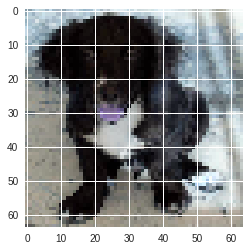

I am 0.76 sure this is a Cat


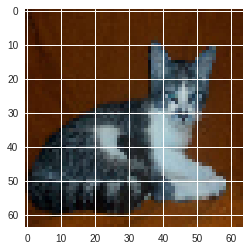

I am 0.85 sure this is a Cat


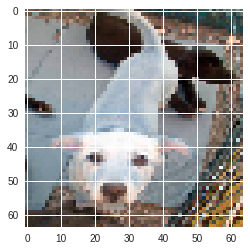

I am 0.82 sure this is a Cat


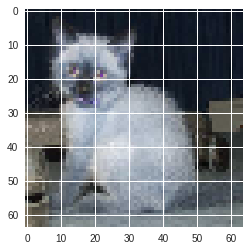

I am 0.63 sure this is a Cat


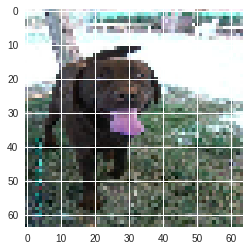

I am 0.57 sure this is a Dog


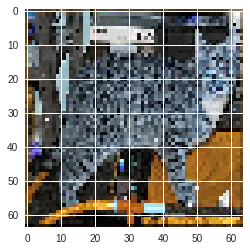

I am 0.75 sure this is a Cat


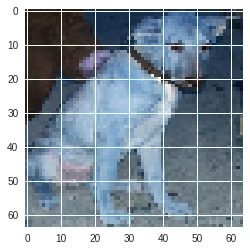

I am 0.72 sure this is a Cat


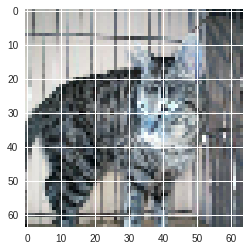

I am 0.73 sure this is a Cat


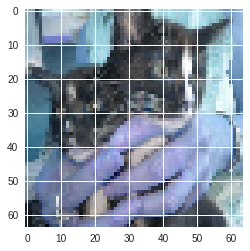

I am 0.57 sure this is a Cat


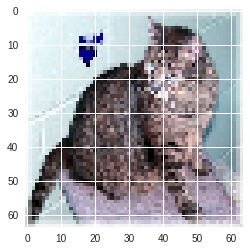

I am 0.78 sure this is a Cat


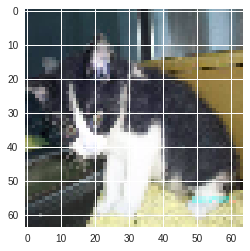

I am 0.80 sure this is a Cat


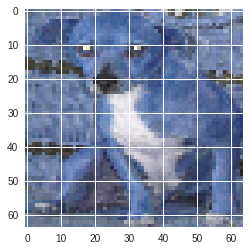

I am 0.75 sure this is a Cat


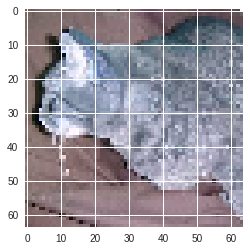

I am 0.69 sure this is a Cat


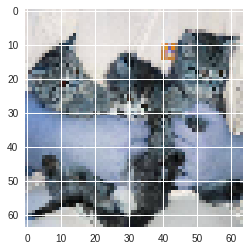

I am 0.87 sure this is a Cat


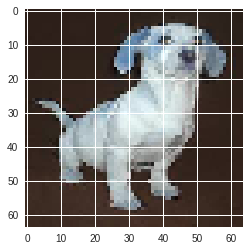

I am 0.60 sure this is a Cat


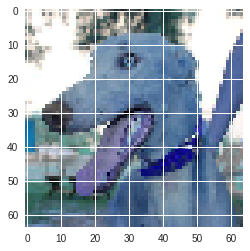

I am 0.54 sure this is a Cat


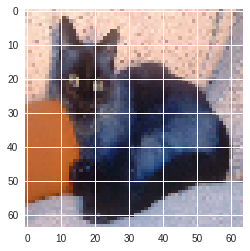

I am 0.78 sure this is a Cat


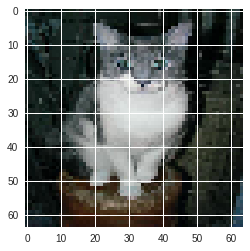

In [166]:
for i in range(0,25):
    if predictions[i,0] >= 0.5:
        print('I am %.2f sure this is a Dog' % predictions[i][0])
    else:
        print('I am %.2f sure this is a Cat' % (1-predictions[i][0]))
    plt.imshow(test[i])
    plt.show()